# Evaluación M3

## Exploración de datos

In [1]:
# Librerías
#%pip install matplotlib seaborn --quiet
#%pip install scikit-learn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Para imputación de nulos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer # Necesario para IterativeImputer
from sklearn.impute import IterativeImputer 
#from sklearn.impute import KNNImputer 
from scipy import stats




In [2]:
# configuración
pd.set_option('display.max_columns', None)


In [3]:
# Cargar datos
#  Customer Flight Activity.csv
df_flight = pd.read_csv('resources/Customer_Flight_Activity.csv')
#df_flight = pd.read_csv('resources/Customer_Flight_Activity.csv', index_col=0)


In [4]:
# Visualizar las primeras filas del dataframe
df_flight.head(2)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [5]:
# Visualizar las últimas filas del dataframe
df_flight.tail(2)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [6]:
# Visualizar filas aleatorias del dataframe
df_flight.sample(5)

                   


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
241036,336770,2018,3,0,0,0,0,0.0,0,0
176798,514652,2017,11,0,0,0,0,0.0,0,0
305877,189707,2018,7,11,11,22,2332,233.0,0,0
105877,339927,2017,7,11,0,11,2629,262.0,0,0
391617,973060,2018,5,0,0,0,0,0.0,0,0


In [7]:
# Visualizar información general del dataframe
df_flight.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [8]:
# Dimensiones del dataframe
print(f"El dataset tiene {df_flight.shape[0]} filas y {df_flight.shape[1]} columnas")


El dataset tiene 405624 filas y 10 columnas


In [9]:
# Nombres de las columnas
print(f"Nombre de las columnas: {df_flight.columns.tolist()}")


Nombre de las columnas: ['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']


In [10]:
# Duplicados
print(f"El dataset tiene {df_flight.duplicated().sum()} filas duplicadas")


El dataset tiene 1864 filas duplicadas


In [11]:
mascara = df_flight.duplicated(keep=False)
df_flight[mascara].sort_values('Loyalty Number').head(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
185953,101902,2017,12,0,0,0,0,0.0,0,0
185952,101902,2017,12,0,0,0,0,0.0,0,0
101447,101902,2017,7,0,0,0,0,0.0,0,0
101448,101902,2017,7,0,0,0,0,0.0,0,0
33844,101902,2017,3,0,0,0,0,0.0,0,0
33843,101902,2017,3,0,0,0,0,0.0,0,0
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
16942,101902,2017,2,0,0,0,0,0.0,0,0
16943,101902,2017,2,0,0,0,0,0.0,0,0


In [12]:
# Eliminar duplicados
df_flight = df_flight.drop_duplicates() # o df_flight.drop_duplicates(inplace=True)
print(f"El dataset tiene {df_flight.duplicated().sum()} filas duplicadas tras eliminar duplicados")
print(f"Ahora el dataset tiene {df_flight.shape[0]} filas y {df_flight.shape[1]} columnas")

El dataset tiene 0 filas duplicadas tras eliminar duplicados
Ahora el dataset tiene 403760 filas y 10 columnas


In [13]:
# Valores nulos por columna
print(f"El dataset tiene {df_flight.isnull().sum()} valores nulos por columna")


El dataset tiene Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64 valores nulos por columna


In [14]:
# Valores nulos totales
print(f"El dataset tiene {df_flight.isnull().sum().sum()} valores nulos")


El dataset tiene 0 valores nulos


In [15]:
# Valores únicos por columna
print(f"El dataset tiene {df_flight.nunique()} valores únicos por columna")



El dataset tiene Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64 valores únicos por columna


In [16]:
# Tipos de datos por columna
print(f"El dataset tiene {df_flight.dtypes} tipos de datos por columna")



El dataset tiene Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object tipos de datos por columna


In [17]:
# Descripción estadística del dataframe
df_flight.describe(include='all').T


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


In [18]:
# Carga de datos customer loyalty
df_loyalty = pd.read_csv('resources/Customer_Loyalty_History.csv')
df_loyalty.head(2)



,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


In [19]:
# Visualizar las últimas filas del dataframe
df_loyalty.tail(2)


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [20]:
# Visualizar filas aleatorias del dataframe
df_loyalty.sample(5)


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1043,786525,Canada,Saskatchewan,Regina,S6J 3G0,Male,Bachelor,99659.0,Married,Aurora,5279.48,Standard,2016,11,NaN,NaN
1903,926494,Canada,Quebec,Tremblant,H5Y 2S9,Male,Master,123841.0,Married,Aurora,7019.18,Standard,2015,11,NaN,NaN
927,820187,Canada,British Columbia,Vancouver,V6E 3D9,Female,College,NaN,Single,Aurora,5162.37,Standard,2016,4,2016.0,7.0
655,596004,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,4881.75,Standard,2013,1,NaN,NaN
15720,486200,Canada,Quebec,Montreal,H2Y 4R4,Female,College,NaN,Single,Star,9095.74,2018 Promotion,2018,2,NaN,NaN


In [21]:
# Visualizar información general del dataframe
df_loyalty.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [22]:
# Dimensiones del dataframe
print(f"El dataset tiene {df_loyalty.shape[0]} filas y {df_loyalty.shape[1]} columnas")


El dataset tiene 16737 filas y 16 columnas


In [23]:
# Nombres de las columnas
print(f"Nombre de las columnas: {df_loyalty.columns.tolist()}")


Nombre de las columnas: ['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']


In [24]:
# Duplicados
print(f"El dataset tiene {df_loyalty.duplicated().sum()} filas duplicadas")


El dataset tiene 0 filas duplicadas


In [25]:
# Valores nulos por columna
print(f"El dataset tiene {df_loyalty.isnull().sum()} valores nulos por columna")


El dataset tiene Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64 valores nulos por columna


In [26]:
# Valores nulos totales
print(f"El dataset tiene {df_loyalty.isnull().sum().sum()} valores nulos")



El dataset tiene 33578 valores nulos


In [27]:
# Valores únicos por columna
print(f"El dataset tiene {df_loyalty.nunique()} valores únicos por columna")



El dataset tiene Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: int64 valores únicos por columna


In [28]:
# Tipos de datos por columna
print(f"El dataset tiene {df_loyalty.dtypes} tipos de datos por columna")



El dataset tiene Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object tipos de datos por columna


In [29]:
# Descripción estadística del dataframe - Numéricas
df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [30]:
# Descripción estadística del dataframe - Categóricas
df_loyalty.describe(include = 'object').T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


### Union de bases


In [31]:
# Se realiza la union de las dos bases de datos por la columna Loyalty Number
df = pd.merge(df_flight, df_loyalty, on='Loyalty Number', how='inner')
df.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN


In [32]:
df.shape

(403760, 25)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

In [34]:
df.isnull().sum()

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
dtype: int64

In [35]:
# Valores nulos por columna en porcentaje redondeado a 2 decimales
porc_nulos =round(df.isnull().sum() / df.shape[0] * 100, 2)
df_nulos = pd.DataFrame(porc_nulos, columns=['%_nulos'])
df_nulos = df_nulos.sort_values(by='%_nulos', ascending=False)
df_nulos

,%_nulos
Cancellation Month,87.70
Cancellation Year,87.70
Salary,25.33
Year,0.00
Flights with Companions,0.00
Total Flights,0.00
Month,0.00
Flights Booked,0.00
Loyalty Number,0.00
Points Redeemed,0.00


In [36]:
# Filtramos para mostrar solo las columnas con nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
Cancellation Month,87.70
Cancellation Year,87.70
Salary,25.33


In [37]:
# 1 nombre columnas poner en minúsculas y con guiones bajos
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

In [38]:
# 2 Valores nulos
# A ) para las columnas que tienen casi 90% de valores nulos, se decide eliminarlas
cols_to_drop = ['cancellation_year', 'cancellation_month', ]
df = df.drop(columns=cols_to_drop)

In [39]:
df.head(2)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3


In [40]:
# B) para la otra columna con valores nulos, salary, se decide imputar
#vuelvo a ver los estadísticos de la columna salary
df['salary'].describe()



count    301500.000000
mean      79258.576285
std       34983.929798
min      -58486.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: salary, dtype: float64

In [41]:
# El minimo es negativo, lo que no tiene sentido en este contexto
# Voy a ver cuántos valores negativos hay
df_salary_neg = df[df['salary'] < 0]
df_salary_neg.shape


(480, 23)

In [42]:
#Se asume que son errores de signo y se convierten a positivos
df["salary"] = df["salary"].abs()

In [43]:
# chequeo que ya no hay negativos
df_salary_neg = df[df['salary'] < 0]
df_salary_neg.shape

(0, 23)

In [44]:
# Muestro los estadísticos de la columna salary tras corregir los negativos
df['salary'].describe()

count    301500.000000
mean      79371.732902
std       34726.433958
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Distribución de Salary')

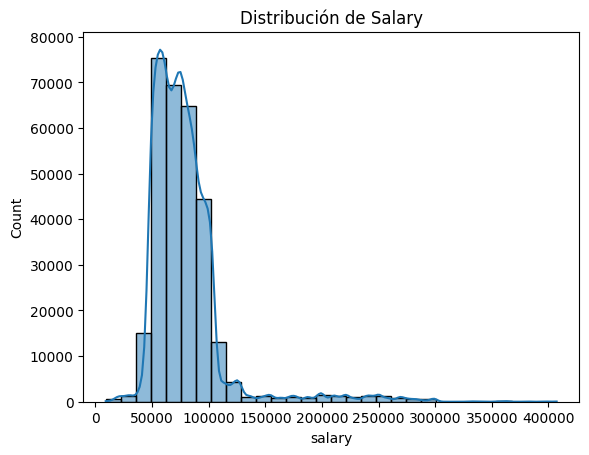

In [45]:
sns.histplot(df['salary'], bins=30, kde=True)
plt.title('Distribución de Salary')

In [46]:
# Por la distribucion asimétrica, se podría imputar por la mediana
# Creo una nueva variable con la columna salary imputada por la mediana
salary_median = df['salary'].fillna(df['salary'].median())

# muestro ambas columnas , no quiero pisar la original , quiero que este la original y la nueva con la imputacion
df['salary_median'] = salary_median
df[['salary', 'salary_median']].head()


,salary,salary_median
0,92552.0,92552.0
1,NaN,73479.0
2,NaN,73479.0
3,63253.0,63253.0
4,91163.0,91163.0


In [47]:
df['salary_median'].isnull().sum()

np.int64(0)

In [48]:
# con simple imputer
imputer = SimpleImputer(strategy='median')
df['salary_simple_imputer'] = imputer.fit_transform(df[['salary']])
df[['salary', 'salary_simple_imputer']].head()

,salary,salary_simple_imputer
0,92552.0,92552.0
1,NaN,73479.0
2,NaN,73479.0
3,63253.0,63253.0
4,91163.0,91163.0


In [49]:
df.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'salary_median',
       'salary_simple_imputer'],
      dtype='object')

In [50]:
# con Iterative Imputer con RFR

# 1. Decidir qué variables usar
# 1. Supongamos que df tiene salary + 3 columnas categóricas que quiero usar como predictoras 
#    ['salary', 'gender', 'education', 'marital_status']
from sklearn.ensemble import RandomForestRegressor


df_RF = df[['salary', 'gender', 'education', 'marital_status']]

# 2. Convertir variables categóricas en dummies (asi las puede usar RFR)
df_encoded = pd.get_dummies(
    df_RF, 
    columns=['gender', 'education', 'marital_status'], 
    drop_first=True   # opcional, evita colinealidad
)

# 3. Definir el imputador (con RandomForest para mejorar imputaciones no lineales)
imputer_iter = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=50, random_state=42),
    max_iter=10,
    random_state=42
)

# 4. Ajustar e imputar sobre el DataFrame con dummies
df_imputed_array = imputer_iter.fit_transform(df_encoded)

# 5. Volver a DataFrame con los mismos nombres de columnas
df_imputed = pd.DataFrame(df_imputed_array, columns=df_encoded.columns)

In [51]:
# mostrasr las primeras filas
df_imputed.head()

,salary,gender_Male,education_College,education_Doctor,education_High School or Below,education_Master,marital_status_Married,marital_status_Single
0,92552.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,71851.124979,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,72504.429982,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,63253.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,91163.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Extraer la columna imputada de salary y añadirla al df original
df['salary_iterative_imputer'] = df_imputed['salary']

# Comparar las diferentes imputaciones
df[['salary','salary_median', 'salary_simple_imputer', 'salary_iterative_imputer']].head()

,salary,salary_median,salary_simple_imputer,salary_iterative_imputer
0,92552.0,92552.0,92552.0,92552.000000
1,NaN,73479.0,73479.0,71851.124979
2,NaN,73479.0,73479.0,72504.429982
3,63253.0,63253.0,63253.0,63253.000000
4,91163.0,91163.0,91163.0,91163.000000


In [53]:
df.loc[df['salary'].isna(), ['salary', 'salary_median', 'salary_simple_imputer', 'salary_iterative_imputer']]


,salary,salary_median,salary_simple_imputer,salary_iterative_imputer
1,NaN,73479.0,73479.0,71851.124979
2,NaN,73479.0,73479.0,72504.429982
17,NaN,73479.0,73479.0,72057.219735
20,NaN,73479.0,73479.0,72590.814921
21,NaN,73479.0,73479.0,72057.219735
...,...,...,...,...
403747,NaN,73479.0,73479.0,72590.814921
403749,NaN,73479.0,73479.0,72590.814921
403752,NaN,73479.0,73479.0,72057.219735
403755,NaN,73479.0,73479.0,72590.814921


In [54]:
df[['salary','salary_median', 'salary_simple_imputer', 'salary_iterative_imputer']].describe().T

,count,mean,std,min,25%,50%,75%,max
salary,301500.0,79371.732902,34726.433958,9081.0,59262.0,73479.000000,88606.0,407228.0
salary_median,403760.0,77879.284748,30117.567539,9081.0,63901.0,73479.000000,82940.0,407228.0
salary_simple_imputer,403760.0,77879.284748,30117.567539,9081.0,63901.0,73479.000000,82940.0,407228.0
salary_iterative_imputer,403760.0,77574.195716,30167.363432,9081.0,63901.0,72057.219735,82940.0,407228.0


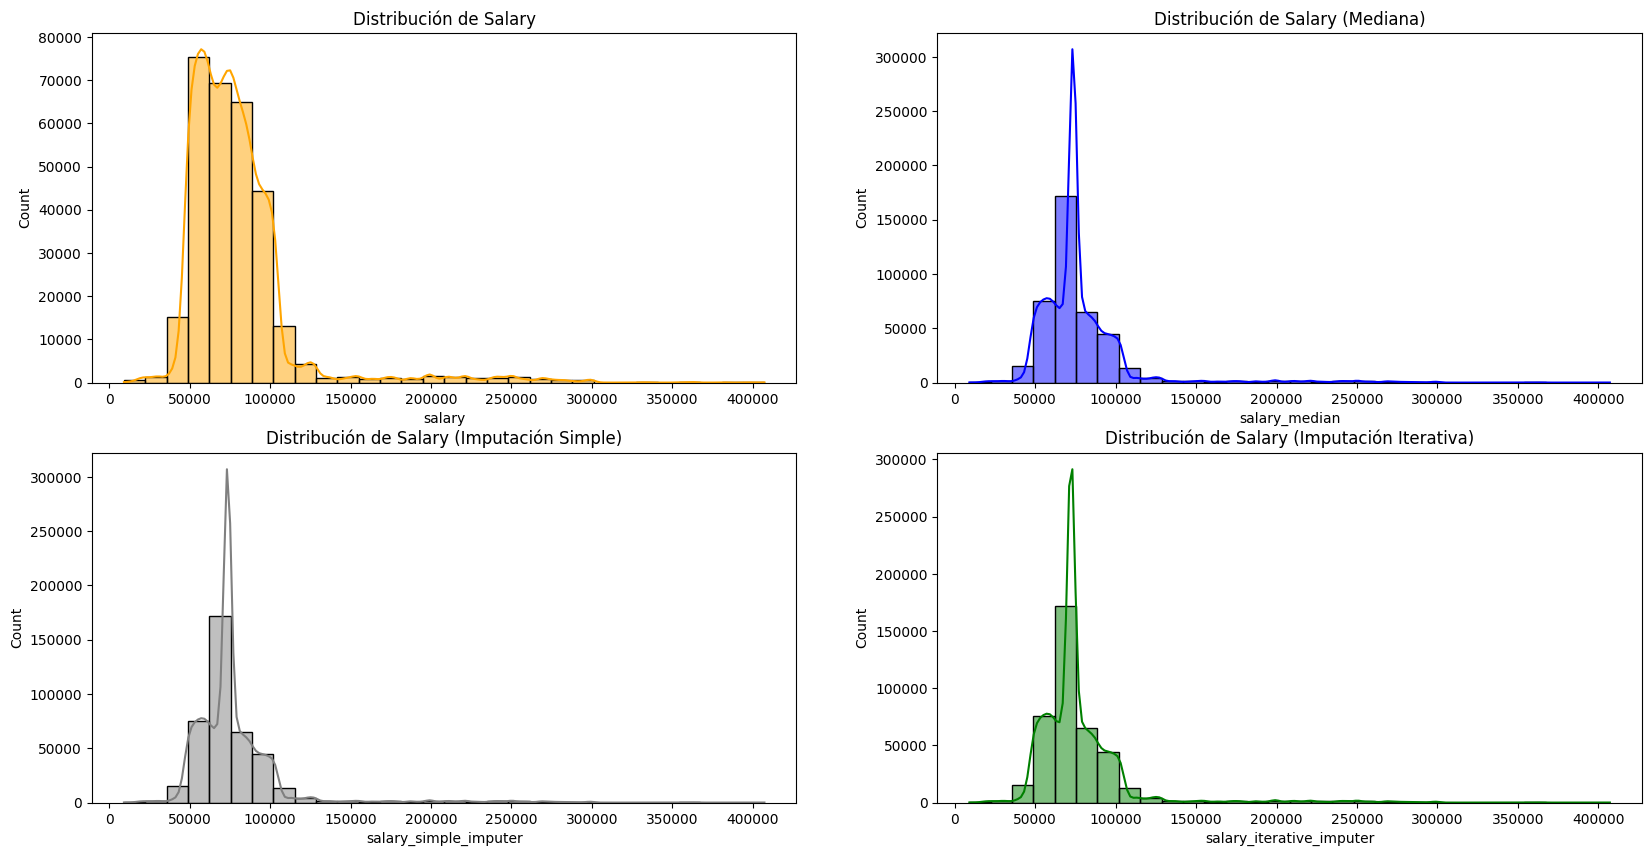

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(df['salary'], bins=30, kde=True, color='orange', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Salary')
sns.histplot(df['salary_median'], bins=30, kde=True, color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Salary (Mediana)')
sns.histplot(df['salary_simple_imputer'], bins=30, kde=True, color='grey', ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Salary (Imputación Simple)')
sns.histplot(df['salary_iterative_imputer'], bins=30, color='green', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Salary (Imputación Iterativa)');

In [ ]:
# me decido por la imputación iterativa, creo que aunque el modelo es básico, puede captar mejor las relaciones entre variables y
# reflejar mejor la distribución original de los datos.
# Además, imputar un 25% de datos es mucho, y la mediana o la imputación simple (mediana se utilizo en este caso igualmente) pueden sesgar demasiado los resultados.

#decido incluir esta en el df final y eliminar las otras imputaciones y la variable original salary


# Guardar la posición original de salary
pos_salary = df.columns.get_loc("salary")

# Eliminar las columnas no deseadas
df_final = df.drop(columns=['salary', 'salary_median', 'salary_simple_imputer'])

# Renombrar columna imputada
df_final = df_final.rename(columns={'salary_iterative_imputer': 'salary'})

# Reordenar columnas: insertar salary en la posición original
cols = df_final.columns.tolist()
cols.insert(pos_salary, cols.pop(cols.index('salary')))
df_final = df_final[cols]

df_final.head()


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.000000,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,71851.124979,Single,Nova,2887.74,Standard,2013,3
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,72504.429982,Divorced,Nova,2838.07,Standard,2016,7
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.000000,Married,Star,4170.57,Standard,2015,8
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.000000,Divorced,Star,6622.05,Standard,2014,1


## Visualizaciones

 1) ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

La media de vuelos por mes es: 86987.04


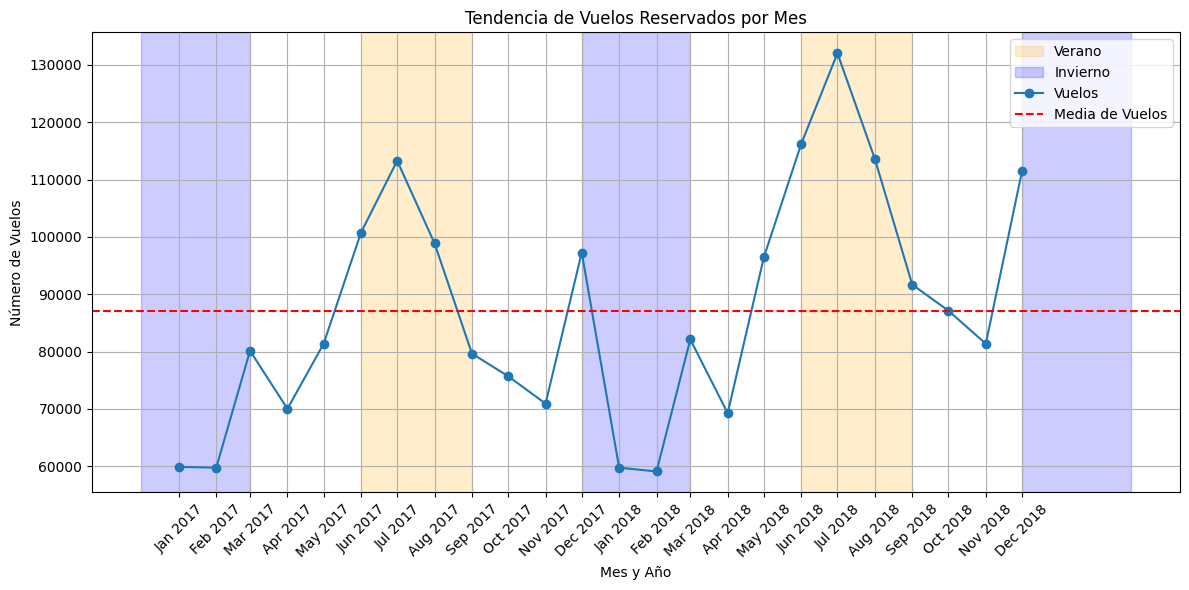

In [57]:
# en matplotlib

# Agrupar por año y mes y contar cuantos vuelos hay por mes

# Primero hago nueva columna con fecha en formato datetime mes y año
df_final['year_month'] = pd.to_datetime(df_final[['year', 'month']].assign(day=1))

# Agrupar por year_month y sumar los vuelos totales de la variable total_flights por mes y año
monthly_flights = df_final.groupby('year_month')['total_flights'].sum().reset_index(name='flight_count')

# Crear columna combinando mes y año para etiquetas del gráfico
monthly_flights['month_year'] = monthly_flights['year_month'].dt.strftime('%b %Y')  # Ej: Jan 2017


# calcular la media de vuelos por mes para incluirla en el grafico como referencia
mean_flights = monthly_flights['flight_count'].mean()
print(f"La media de vuelos por mes es: {mean_flights:.2f}")

plt.figure(figsize=(12, 6))  # crear la figura primero

# Marcar áreas de verano/invierno para 2017-2018
plt.axvspan(pd.to_datetime('2017-06-01'), pd.to_datetime('2017-09-01'), color='orange', alpha=0.2, label='Verano')
plt.axvspan(pd.to_datetime('2018-06-01'), pd.to_datetime('2018-09-01'), color='orange', alpha=0.2)
plt.axvspan(pd.to_datetime('2016-12-01'), pd.to_datetime('2017-03-01'), color='blue', alpha=0.2, label='Invierno')
plt.axvspan(pd.to_datetime('2017-12-01'), pd.to_datetime('2018-03-01'), color='blue', alpha=0.2)
plt.axvspan(pd.to_datetime('2018-12-01'), pd.to_datetime('2019-03-01'), color='blue', alpha=0.2)


# Graficar los vuelos
plt.plot(monthly_flights['year_month'], monthly_flights['flight_count'], marker='o', label='Vuelos')

# Línea de referencia con la media
plt.axhline(y=mean_flights, color='r', linestyle='--', label='Media de Vuelos')

# Configurar etiquetas y leyenda
plt.title('Tendencia de Vuelos Reservados por Mes')
plt.xlabel('Mes y Año')
plt.ylabel('Número de Vuelos')
plt.xticks(ticks=monthly_flights['year_month'], labels=monthly_flights['month_year'], rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


In [58]:
#Antes de graficar con SNS, mostrar los datos que se estan utilizando en una tabla con la fecha por año en una columna y mes en otra columna y la variable flight_count

flight_table = pd.DataFrame({
    'year': monthly_flights['year_month'].dt.year,
    'month': monthly_flights['year_month'].dt.strftime('%B'),
    'flight_count': monthly_flights['flight_count']
})

flight_table.head()

,year,month,flight_count
0,2017,January,59888
1,2017,February,59760
2,2017,March,80140
3,2017,April,70015
4,2017,May,81353


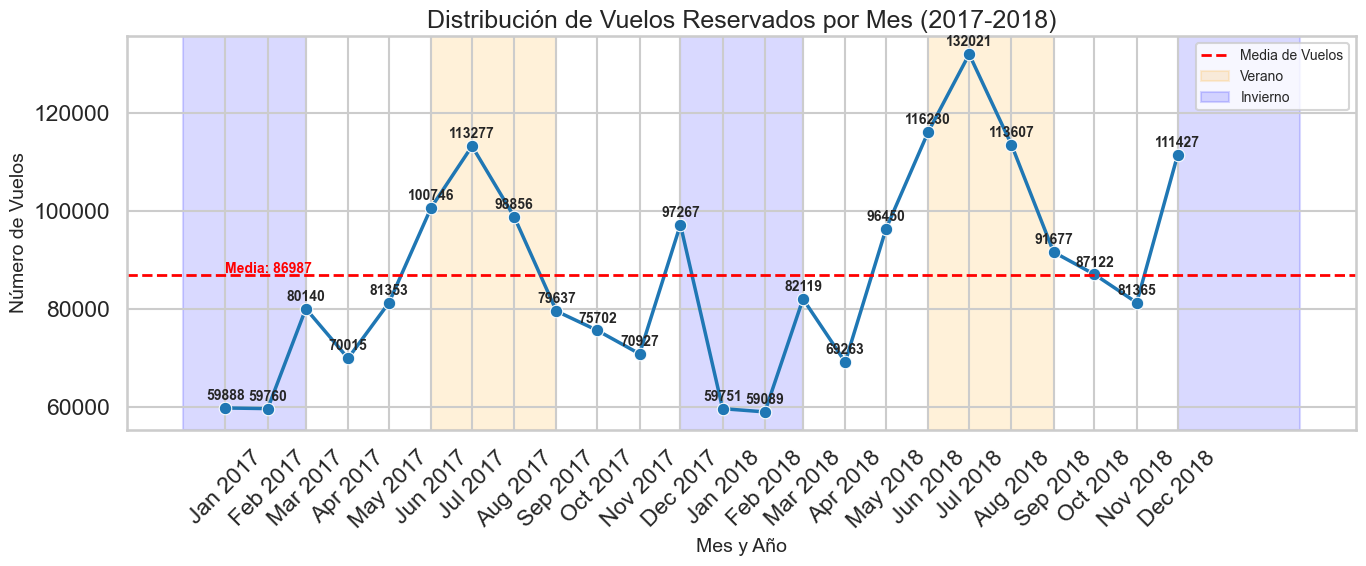

In [59]:
# en Seaborn

# Extraer el año para usar como hue si se quisiera
monthly_flights['year'] = monthly_flights['year_month'].dt.year

# Configurar estilo Seaborn
sns.set_style("whitegrid")
sns.set_context("talk")  # mejora tamaño de fuentes para presentación

plt.figure(figsize=(14, 6))

# Línea por año superpuesta
sns.lineplot(
    data=monthly_flights,
    x='year_month',
    y='flight_count',
    #hue='year', # comento hue para que no divida por años y se vea la tendencia general
    marker='o',
    linewidth=2.5,
    #palette='tab10', # paleta de colores si se usa hue
    errorbar=None
)

# Añadir etiquetas de datos encima de cada punto
for x, y in zip(monthly_flights['year_month'], monthly_flights['flight_count']):
    plt.text(x, y + 1000, str(y), ha='center', va='bottom', fontsize=10, weight='bold')  # +1000 para separar del marcador

# Línea de referencia con la media
mean_flights = monthly_flights['flight_count'].mean()
plt.axhline(y=mean_flights, color='red', linestyle='--', linewidth=2, label='Media de Vuelos')
plt.text(monthly_flights['year_month'].min(), mean_flights + 500, f'Media: {mean_flights:.0f}', color='red', fontsize=10, weight='bold')

# Áreas de verano/invierno
axvspan_kwargs = dict(alpha=0.15, zorder=0)
plt.axvspan(pd.to_datetime('2017-06-01'), pd.to_datetime('2017-09-01'), color='orange', label='Verano', **axvspan_kwargs)
plt.axvspan(pd.to_datetime('2018-06-01'), pd.to_datetime('2018-09-01'), color='orange', **axvspan_kwargs)
plt.axvspan(pd.to_datetime('2016-12-01'), pd.to_datetime('2017-03-01'), color='blue', label='Invierno', **axvspan_kwargs)
plt.axvspan(pd.to_datetime('2017-12-01'), pd.to_datetime('2018-03-01'), color='blue', **axvspan_kwargs)
plt.axvspan(pd.to_datetime('2018-12-01'), pd.to_datetime('2019-03-01'), color='blue', **axvspan_kwargs)

# Etiquetas y título
plt.title('Distribución de Vuelos Reservados por Mes (2017-2018)', fontsize=18)
plt.xlabel('Mes y Año', fontsize=14)
plt.ylabel('Número de Vuelos', fontsize=14)
plt.xticks(ticks=monthly_flights['year_month'], labels=monthly_flights['month_year'], rotation=45)

# Leyenda limpia, evitando duplicados
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=10, loc='upper right')

plt.tight_layout()

#guardar figura
plt.savefig('resources/flights_month_sns.png', dpi=300)
plt.show()

### Interpretacion
Se observa una tendencia cíclica anual, en la cantidad de vuelos de los clientes en el periodo 2017-2018.  
Hay un aumento pronunciado de cantidad de vuelos en las vacaciones de verano, y otro pico no tan marcado en invierno. Luego de estos periodos se observa un descenso.
Al realizar un analisis interanual, pareciera observarse un aumento generalizado en el 2018 vs 2017, principalmente en la epoca pre-estival y estival con aproximadamente 2k de diferencia.
La media en este periodo fue de 86987 vuelos mensuales, como se observa en el grafico con linea de puntos roja.


 2) ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
 

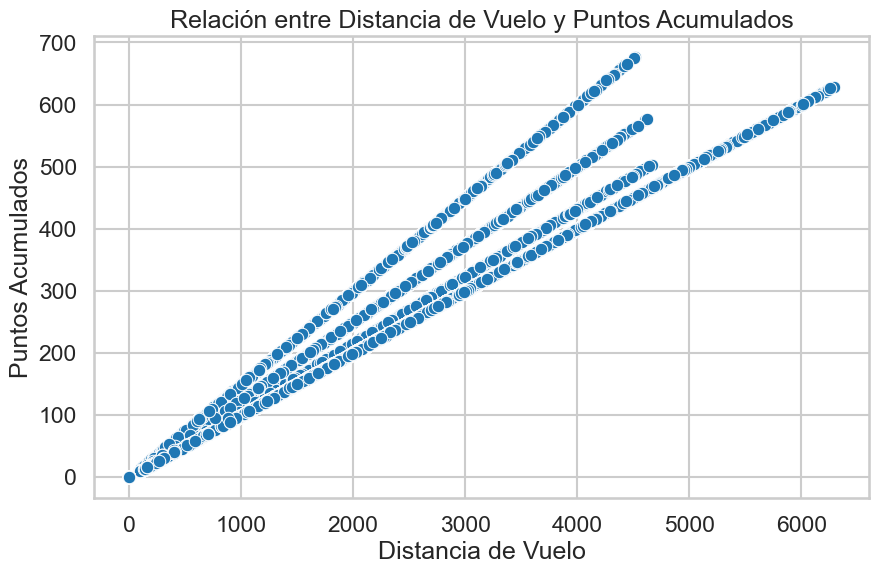

In [60]:
# primero scatter plot para ver distribucion y outliers

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_final, x='distance', y='points_accumulated')
plt.title('Relación entre Distancia de Vuelo y Puntos Acumulados')
plt.xlabel('Distancia de Vuelo')
plt.ylabel('Puntos Acumulados')
plt.show()

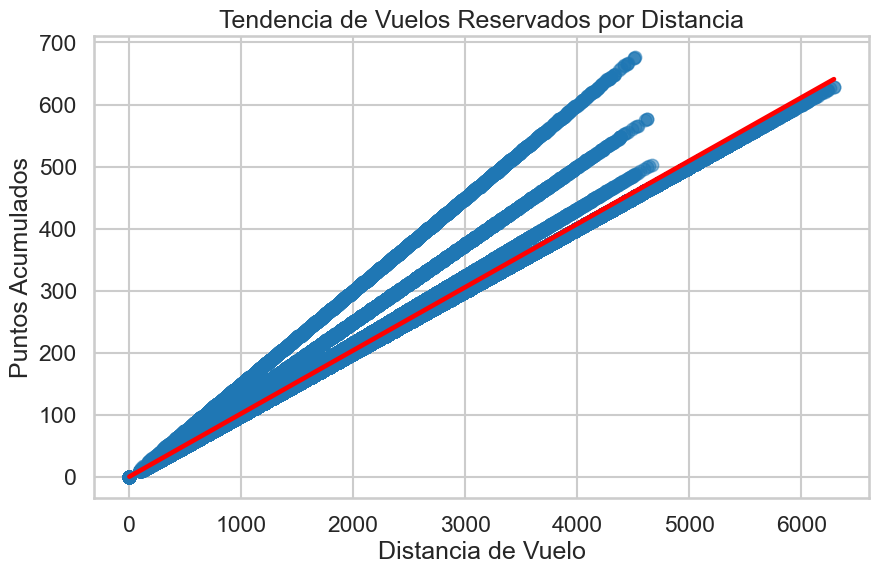

In [61]:
# ahora hago un regplot para ver la tendencia lineal
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.regplot(data=df_final, x='distance', y='points_accumulated', scatter_kws={'alpha':0.5},  line_kws={'color':'red'})
plt.title('Tendencia de Vuelos Reservados por Distancia')
plt.xlabel('Distancia de Vuelo')
plt.ylabel('Puntos Acumulados')
plt.show()

In [62]:
# calculo coeficiente de correlacion
correlation = df_final['distance'].corr(df_final['points_accumulated'])
print(f"El coeficiente de correlación entre distancia y puntos acumulados es: {correlation:.4f}")

El coeficiente de correlación entre distancia y puntos acumulados es: 0.9945


### Interpretacion
Se observa claramente una relacion lineal positiva entre la distancia y los puntos acumulados. Ya que se obtuvo con coeficiente de correlacion de 0,99.
De manera visual y a través del calculo del coeficiente se puede concluir una obviedad teniendo en cuenta el contexto, que es a mayor distancia recorrida mayor cantidad de puntos se acumulan.
Seguramente la empresa aérea ofrece paquete de beneficios segun km volados donde se incluye estos puntos acumulados.

3¿Cuál es la distribución de los clientes por provincia o estado?


In [63]:
# la distribucion de clientes por provincia o estado
# Primero veo cuántos valores únicos hay en la columna state_province
print(df_final['province'].nunique())
print(df_final['province'].value_counts())  # Mostrar las 10 provincias/estados más comunes

11
province
Ontario                 130258
British Columbia        106442
Quebec                   79573
Alberta                  23360
Manitoba                 15900
New Brunswick            15352
Nova Scotia              12507
Saskatchewan              9861
Newfoundland              6244
Yukon                     2679
Prince Edward Island      1584
Name: count, dtype: int64


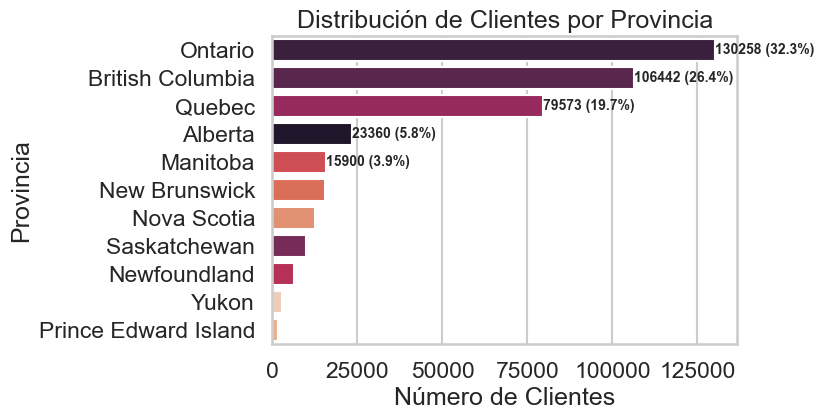

In [64]:
#graficar la distribucion de clientes por provincia
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))

# Ordenar las provincias por cantidad de clientes
province_counts = df_final['province'].value_counts()
top_provinces = province_counts.head(5).index  # las 5 primeras provincias

# Graficar
sns.countplot(
    data=df_final, 
    y='province', 
    hue='province', 
    palette='rocket', 
    order=province_counts.index
)

plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Número de Clientes')
plt.ylabel('Provincia')

# Incluir etiquetas con el número de clientes y porcentaje para las 5 primeras barras
total_clients = df_final.shape[0]

for index, province in enumerate(top_provinces):
    value = province_counts[province]
    pct = value / total_clients * 100
    plt.text(value, index, f"{value} ({pct:.1f}%)", va='center', ha='left', fontsize=10, fontweight='bold')

#guardar la figura
save_path = 'resources/province_distribution.png'
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor="#ffffffff")

plt.show()

### Interpretacion
La provincia de la cual proviene casi un tercio de los clientes es Ontario con aproximadamente 130 mil cientes. 
Las 3 provincias a la que pertenece la mayor cantidad de clientes son Ontario, British Columbia y Quebec, representando casi un 80% del total.



4) ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?



In [65]:
# Agrupar por nivel educativo y calcular estadísticas

#primero ordeno los niveles educativos para que se vean bien en el grafico

# Definir el orden deseado de niveles educativos
education_order = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']

# Agrupar por nivel educativo y calcular estadísticas
salary_by_edu = (
    df_final.groupby('education')['salary']
    .agg(mean_salary='mean', std_salary='std', count='count')
    .reindex(education_order)  # ordena directamente por la lista
    .reset_index()
)

salary_by_edu

,education,mean_salary,std_salary,count
0,High School or Below,61146.378165,12105.350590,18915
1,College,72274.396559,409.861203,102260
2,Bachelor,72599.080913,16667.675569,252567
3,Master,103734.523724,17518.492270,12287
4,Doctor,178403.675202,70380.054033,17731


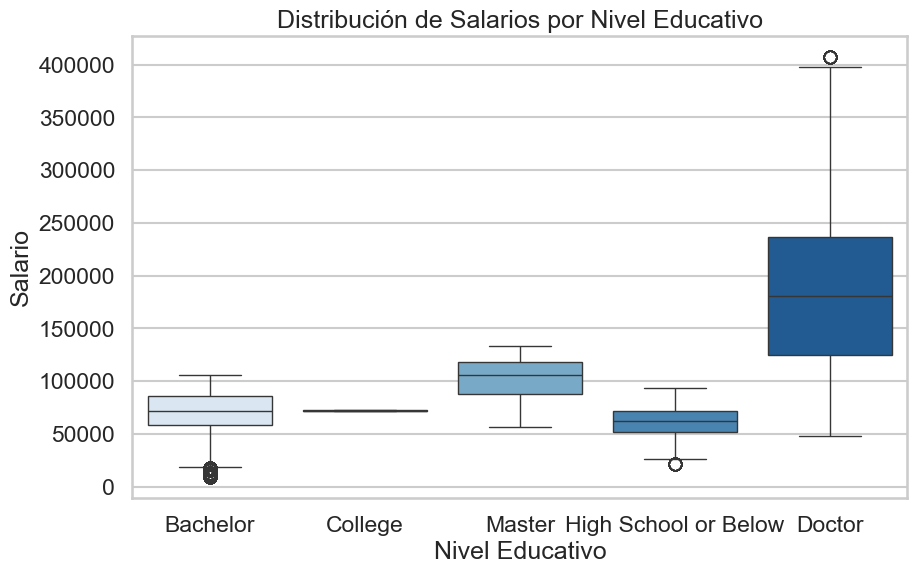

In [66]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_final, x='education', y='salary', hue='education', legend=False, palette='Blues')
plt.title('Distribución de Salarios por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario')
plt.show()

### Interpretación
Para la gran mayoria de categorias de educacion, se observa un rango intercuartilico pequeño en comparación con la categoría superior de educacion, clientes con doctorado. Esta categoría además de tener un rango más amplio presenta una mediana, observada en el gráfico, y una media (en tabla) mucho mas elevada que el resto de categorías.
Si se realizan analisis estadisticos seguramente se confirmaría la idea mencionada que las personas que tienen estudios de doctorado tienen de media salarial un valor más alto que el resto de las categorias de educacion.

 5) ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


In [67]:
# ver tabla distribuciones de loyalty_card
df_final['loyalty_card'].value_counts()



loyalty_card
Star      183745
Nova      136883
Aurora     83132
Name: count, dtype: int64

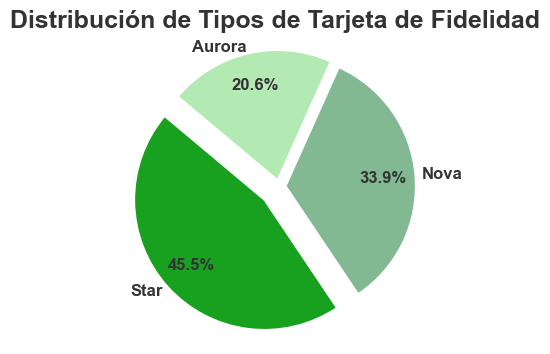

In [68]:
#hacer piechart de loyalty_card
# Datos
loyalty_counts = df_final['loyalty_card'].value_counts()
labels = loyalty_counts.index
sizes = loyalty_counts.values
colors = ["#17a11e","#1e813c8d","#7ada7a92"]

# Explode: destacar la categoría más grande
explode = [0.05 if i != sizes.argmax() else 0.15 for i in range(len(sizes))]

fig, ax = plt.subplots(figsize=(4,4), facecolor="#ffffffff")

ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    textprops={'fontsize': 12, 'weight':'bold', 'color':'#333333'},
    pctdistance=0.75,
    labeldistance=1.05,
    wedgeprops={'edgecolor':'white', 'linewidth':1.5}
)

ax.set_title('Distribución de Tipos de Tarjeta de Fidelidad', fontsize=18, weight='bold', color='#333333')
ax.axis('equal')

# Guardar figura
fig.savefig('resources/loyalty_card_distribution.png', dpi=300, bbox_inches='tight', facecolor="#ffffffff")
plt.show()

### Interpretacion
Casi la mitad de clientes, 45,5% presenta tarjeta de fidelidad de tipo STAR. Aproximadamente un tercio tiene el tipo NOVA y un quinto restante tiene de tipo Aurora.


 6¿Cómo se distribuyen los clientes según su estado civil y género?

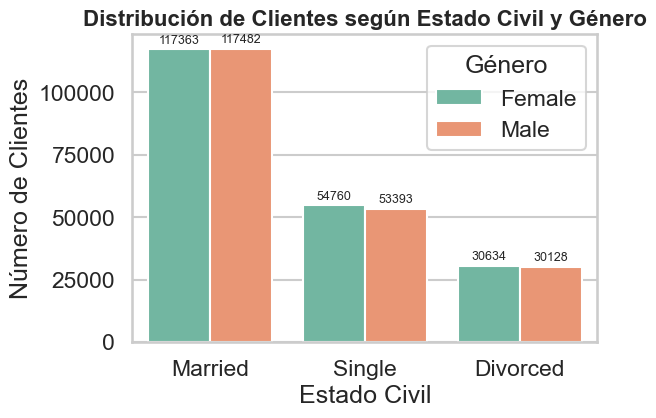

In [69]:
# Distribución de clientes según estado civil y género
# grafico de barras agrupadas
sns.set_style("whitegrid")  


plt.figure(figsize=(6,4))
ax = sns.countplot(
    data=df_final,
    x='marital_status',
    hue='gender',
    palette='Set2'
)

plt.title('Distribución de Clientes según Estado Civil y Género', fontsize=16, weight='bold')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
# Agregar etiquetas de valores absolutos
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)
plt.legend(title='Género')
plt.show()


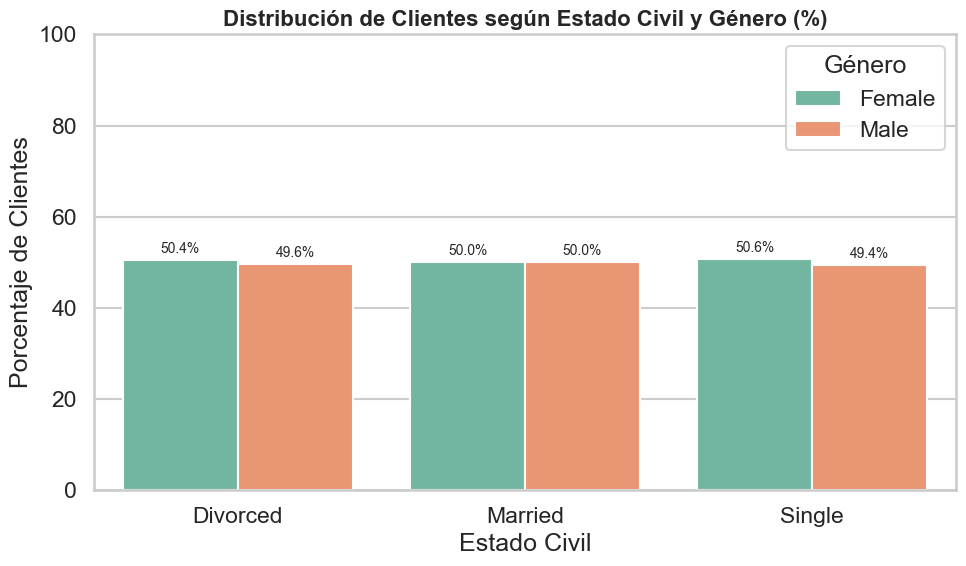

In [70]:

# Crear tabla de frecuencias absoluta
prop_table = df_final.groupby(['marital_status','gender']).size().reset_index(name='count')

# Calcular porcentaje dentro de cada estado civil
prop_table['percent'] = prop_table.groupby('marital_status')['count'].transform(lambda x: 100 * x / x.sum())

# Graficar
plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=prop_table,
    x='marital_status',
    y='percent',
    hue='gender',
    palette='Set2'
)

# Título y ejes
plt.title('Distribución de Clientes según Estado Civil y Género (%)', fontsize=16, weight='bold')
plt.xlabel('Estado Civil')
plt.ylabel('Porcentaje de Clientes')
plt.ylim(0, 100)
plt.legend(title='Género')

# Agregar etiquetas a cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

### Interpretacion
En el gráfico de barras con valores absolutos se observa que la mayoría de las personas están casadas. Pero al observar si existen diferencias de proporciones entre sexo, no se osberva nada para ninguna categoría. Las distribuciones son practicamente iguales segun genero.

## Análisis estadísticos

### Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

In [71]:
# preparacion de datos para analisis estadistico
display(df_final['education'].value_counts())

display(df_final['flights_booked'].agg(['count', 'mean', 'std']))

# crear grupos por nivel educativo
high_school_below = df_final[df_final['education'] == 'High School or Below']['flights_booked']
college = df_final[df_final['education'] == 'College']['flights_booked']
bachelor = df_final[df_final['education'] == 'Bachelor']['flights_booked']
master = df_final[df_final['education'] == 'Master']['flights_booked']
doctor = df_final[df_final['education'] == 'Doctor']['flights_booked']

display(high_school_below.describe())
display(college.describe())
display(bachelor.describe())
display(master.describe())
display(doctor.describe())

# Mostrar una tabla resumen de la media y desviación estándar por grupo
summary_table = pd.DataFrame({
    'Grupo': ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor'],
    'Media': [high_school_below.mean(), college.mean(), bachelor.mean(), master.mean(), doctor.mean()],
    'Desviación Estándar': [high_school_below.std(), college.std(), bachelor.std(), master.std(), doctor.std()]
})

display(summary_table)

education
Bachelor                252567
College                 102260
High School or Below     18915
Doctor                   17731
Master                   12287
Name: count, dtype: int64

count    403760.000000
mean          4.134050
std           5.230064
Name: flights_booked, dtype: float64

count    18915.000000
mean         4.176209
std          5.239267
min          0.000000
25%          0.000000
50%          1.000000
75%          8.000000
max         21.000000
Name: flights_booked, dtype: float64

count    102260.000000
mean          4.169744
std           5.246040
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max          21.000000
Name: flights_booked, dtype: float64

count    252567.000000
mean          4.110288
std           5.221671
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max          21.000000
Name: flights_booked, dtype: float64

count    12287.000000
mean         4.200700
std          5.213956
min          0.000000
25%          0.000000
50%          1.000000
75%          8.000000
max         21.000000
Name: flights_booked, dtype: float64

count    17731.000000
mean         4.175512
std          5.256971
min          0.000000
25%          0.000000
50%          1.000000
75%          8.000000
max         21.000000
Name: flights_booked, dtype: float64

,Grupo,Media,Desviación Estándar
0,High School or Below,4.176209,5.239267
1,College,4.169744,5.246040
2,Bachelor,4.110288,5.221671
3,Master,4.200700,5.213956
4,Doctor,4.175512,5.256971


In [72]:
# evaluar normalidad con k-s o shapiro - aunque ya se sabe que son grandes muestras
print(len(high_school_below), len(college), len(bachelor), len(master), len(doctor))

18915 102260 252567 12287 17731


In [73]:
grupos = [high_school_below, college, bachelor, master, doctor]

In [74]:
#  función prueba de hipótesis para el t-test de Student
def prueba_hipotesis(alfa, *args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney (alternativa no paramétrica).

    Parámetros:
    *args: listas o arrays con los datos de cada grupo.

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            p_valor = stats.ttest_ind(*args, equal_var=True).pvalue
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            p_valor = stats.ttest_ind(*args, equal_var=False).pvalue
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        try: # si tengo dos grupos
            p_valor = stats.mannwhitneyu(*args).pvalue
            test_usado = "Mann-Whitney U (prueba no paramétrica)"
        except: # si tengo mas de dos grupos
            p_valor = stats.kruskal(*args).pvalue
            test_usado = "Kruskal Wallis"



    # Nivel de significancia
    alfa = alfa

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0 (Diferencias significativas)" if p_valor < alfa else "No se rechaza H0 (No hay diferencias significativas)"
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f" p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

    return resultado

In [75]:
prueba_hipotesis(0.05, grupos[0], grupos[1], grupos[2], grupos[3], grupos[4])


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [np.False_, np.False_, np.False_, np.False_, np.False_]
✅ Test de Varianza: Desiguales (p = 0.0150)
✅ Test aplicado: Kruskal Wallis
 p-valor: 0.0015
🔍 Conclusión: Rechazamos H0 (Diferencias significativas)



{'Test de Normalidad': [np.False_, np.False_, np.False_, np.False_, np.False_],
 'Datos Normales': False,
 'p-valor Varianza': np.float64(0.014969793534581529),
 'Varianzas Iguales': np.False_,
 'Test Usado': 'Kruskal Wallis',
 'p-valor': np.float64(0.0015225470219889365),
 'Conclusión': 'Rechazamos H0 (Diferencias significativas)'}

### Interpetación
Las distribuciones por grupos de edad de la variable vuelos reservados por los clientes fueron no normales para todos los grupos.
El test de varianzas indicó que las mismas fueron diferentes y se aplicó el test de kruskal Wallis por ser más de 2 grupos.
El valor p obtenido fue menor a nuestro alfa de 0.05, por lo que no se acepta la H0 y se debe concluir que las medias de vuelos reservados fueron diferentes segun el nivel educativo de los clientes.